In [39]:
import random
import numpy as np
from utils import plottings
import matplotlib.pyplot as plt

from utils.evaluation import rmse_error, r2_error


(3, 4, 1, 256, 256)


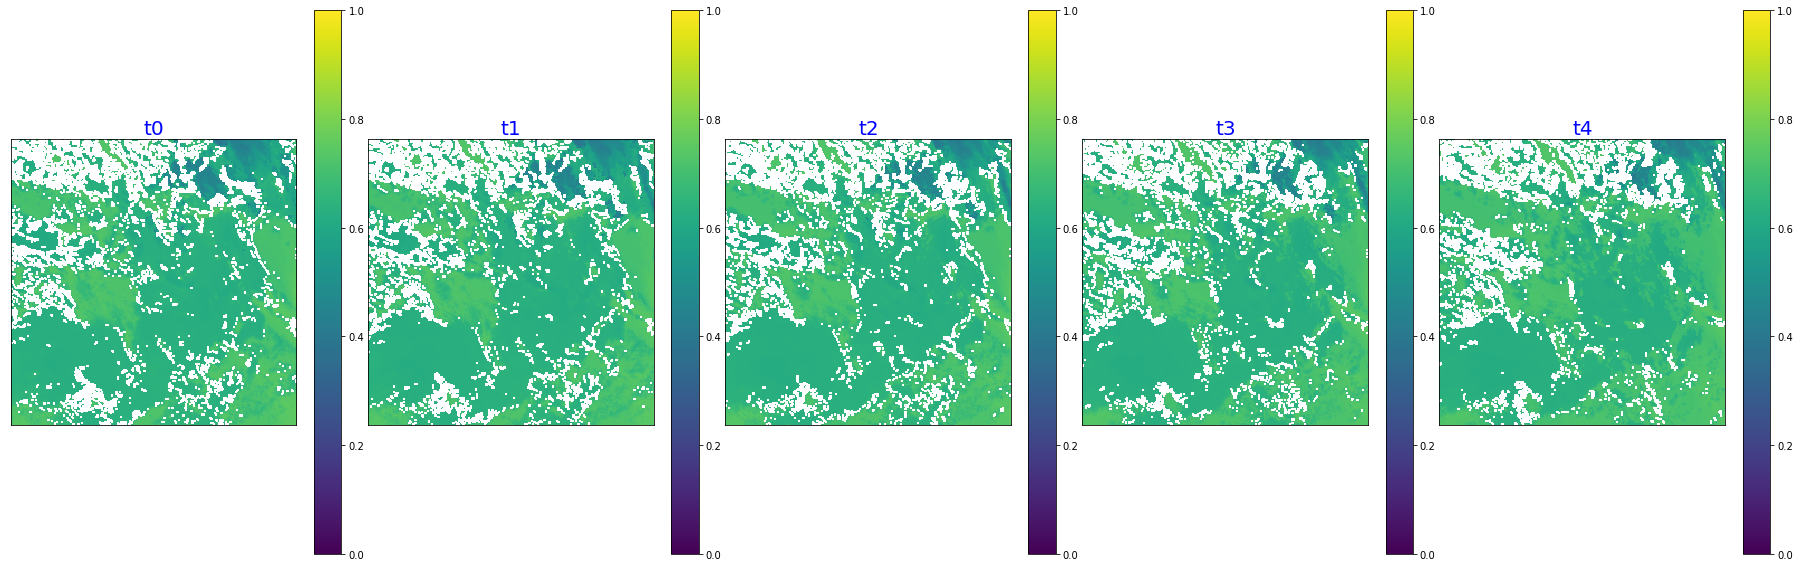

0.100141406 0.25373492


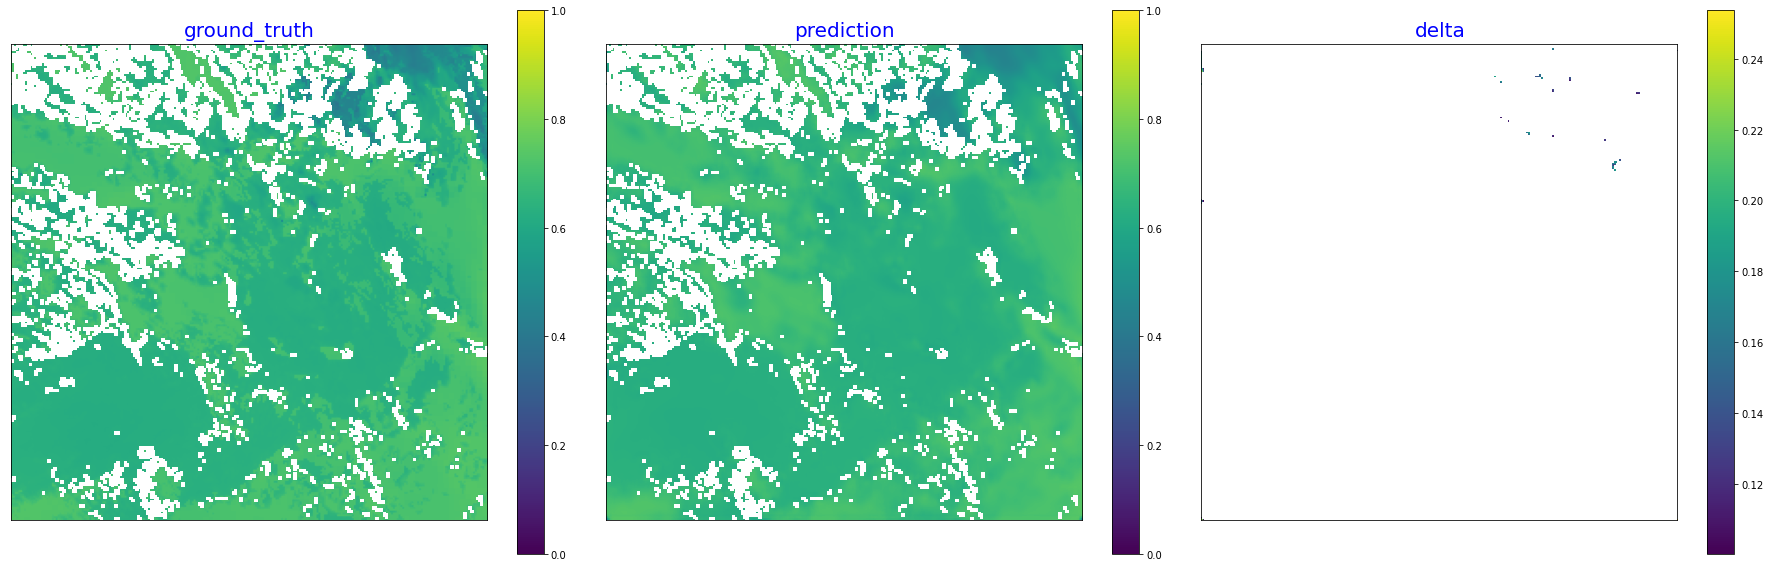

TEST - RMSE = 0.031462, R2 = 0.713782


In [41]:
data = np.load('./prediction.npz')

history = data['history']
prediction = data['prediction']
ground_truth = data['ground_truth']
history_mask = data['history_mask']
ground_truth_mask = data['ground_truth_mask']

history[history_mask] = np.nan
prediction[ground_truth_mask] = np.nan
ground_truth[ground_truth_mask] = np.nan

i = 0
# delta[delta < 0.5] = np.nan
# print(np.where(delta > 0.5))
# print(delta.shape)

print(history.shape)

images = [history[i, 0, 0, :, :], 
          history[i, 1, 0, :, :], 
          history[i, 2, 0, :, :], 
          history[i, 3, 0, :, :],
          ground_truth[i, 0, 0, :, :]]
texts = ['t0', 't1', 't2', 't3', 't4']
plottings.plot_N(images, texts, 
                 min_values=[0, 0, 0, 0, 0], 
                 max_values=[1, 1, 1, 1, 1])

delta = np.abs(ground_truth[i, 0, 0, :, :] - prediction[i, 0, 0, :, :]) 
delta[delta < 0.1] = np.nan
images = [ground_truth[i, 0, 0, :, :], prediction[i, 0, 0, :, :], delta]
texts = ['ground_truth', 'prediction', 'delta']

print(np.nanmin(delta), np.nanmax(delta))
plottings.plot_N(images, texts, 
                 min_values=[0, 0, np.nanmin(delta)], 
                 max_values=[1, 1, np.nanmax(delta)])

rmse = rmse_error(ground_truth, prediction)
r2 = r2_error(ground_truth, prediction)
print('TEST - RMSE = {:.6f}, R2 = {:.6f}'.format(rmse, r2))
    

In [8]:
ground_truth_mask

array([[[[[ True, False, False, ..., False, False, False],
          [ True, False, False, ..., False, False, False],
          [ True, False,  True, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]]]],



       [[[[False, False, False, ..., False, False, False],
          [False,  True, False, ...,  True, False, False],
          [False, False, False, ...,  True, False, False],
          ...,
          [ True,  True, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]]]],



       [[[[False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ...,  True,  True,  True],

151 93


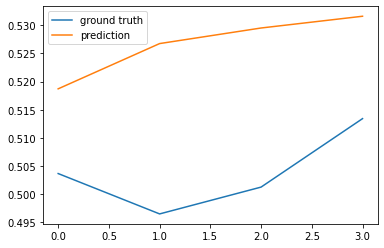

In [43]:
lon, lat = random.randint(0, 255), random.randint(0, 255)
print(lon, lat)
x=range(ground_truth.shape[1])
y1=ground_truth[0, :, 0, lon, lat]
y2=prediction[0, :, 0, lon, lat]
fig = plt.figure()
plt.plot(x, y1, label="ground truth")
plt.plot(x, y2, label="prediction")
plt.legend()
plt.show()

In [1]:
import os 
import time
import logging
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

from utils.options import parse_args, load_param_dict
from utils.data_loader import WMDataset, split_train_val_test
from models import Seq2Seq
from utils.evaluation import rmse_error, r2_error

params = load_param_dict(args=None, mode='test')
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dataset = WMDataset(data_path=params['data_path'], 
                        sample_path=params['sample_path'],
                        region_id=params['region_id'], 
                        source_vars=['temperature'],
                        target_vars=['temperature'],
                        seq_len=params['seq_len'],
                        horizon=params['horizon'],
                        use_static=params['use_static'])
    
train_dataset, _, test_dataset = split_train_val_test(dataset)

mode - test
data_path - /home/yaoyi/lin00786/weather4cast/preprocess-data/
sample_path - ./samples.csv
region_id - R1
model_name - Seq2Seq_seq4_hoz1_in1_out1_kernel1
result_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1
gpu_id - 0
num_epochs - 100
batch_size - 32
lr - 0.001
weight_decay - 0.001
patience - 10
log_interval - 1
h_dim - 64
kernel_size - 3
seq_len - 4
horizon - 1
use_static - False
num_test - 1
verbose - True
model_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/models/epoch=8-val_loss=0.00.ckpt
log_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/logs
log_file_path - /home/yaoyi/lin00786/weather4cast/weather4cast-test-lightning/results/Seq2Seq_seq4_hoz1_in1_out1_kernel1/logs/Seq2Seq_seq4_hoz1_in1_out1_kernel1_test.log


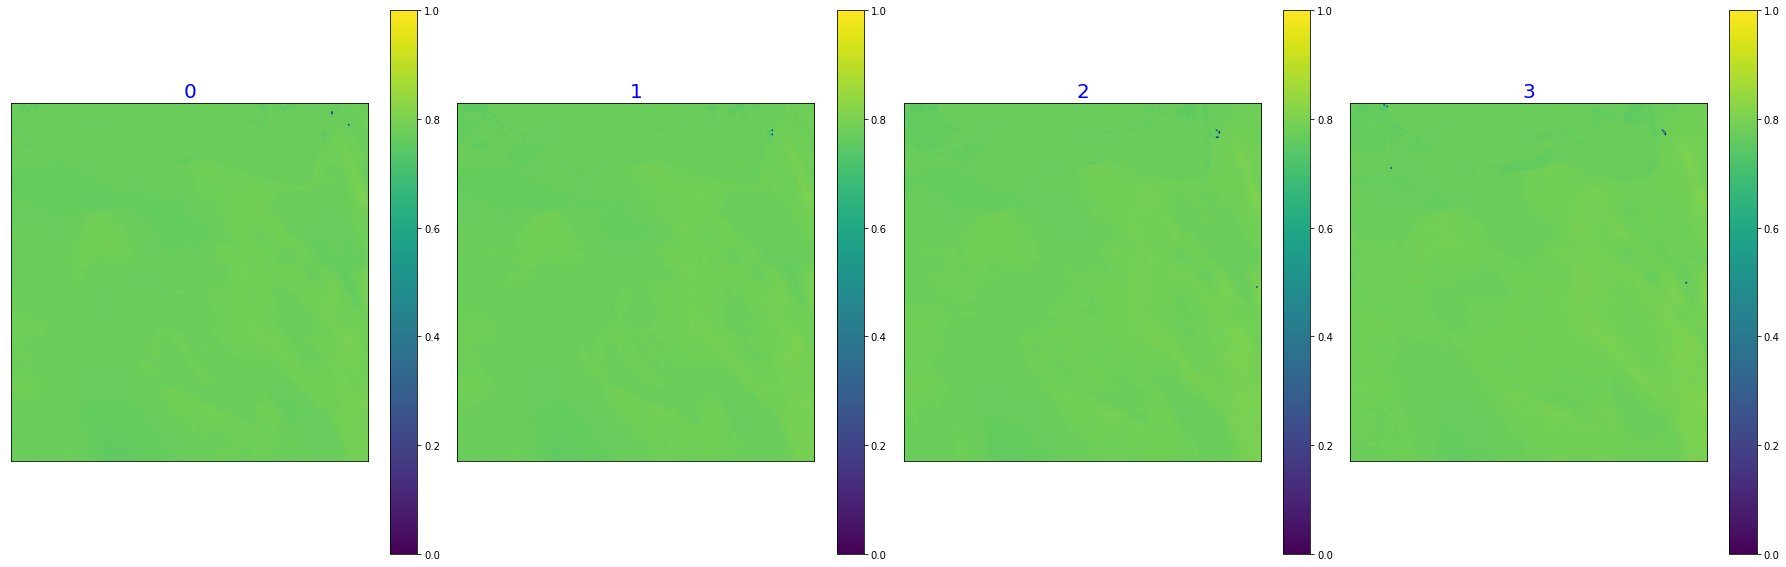

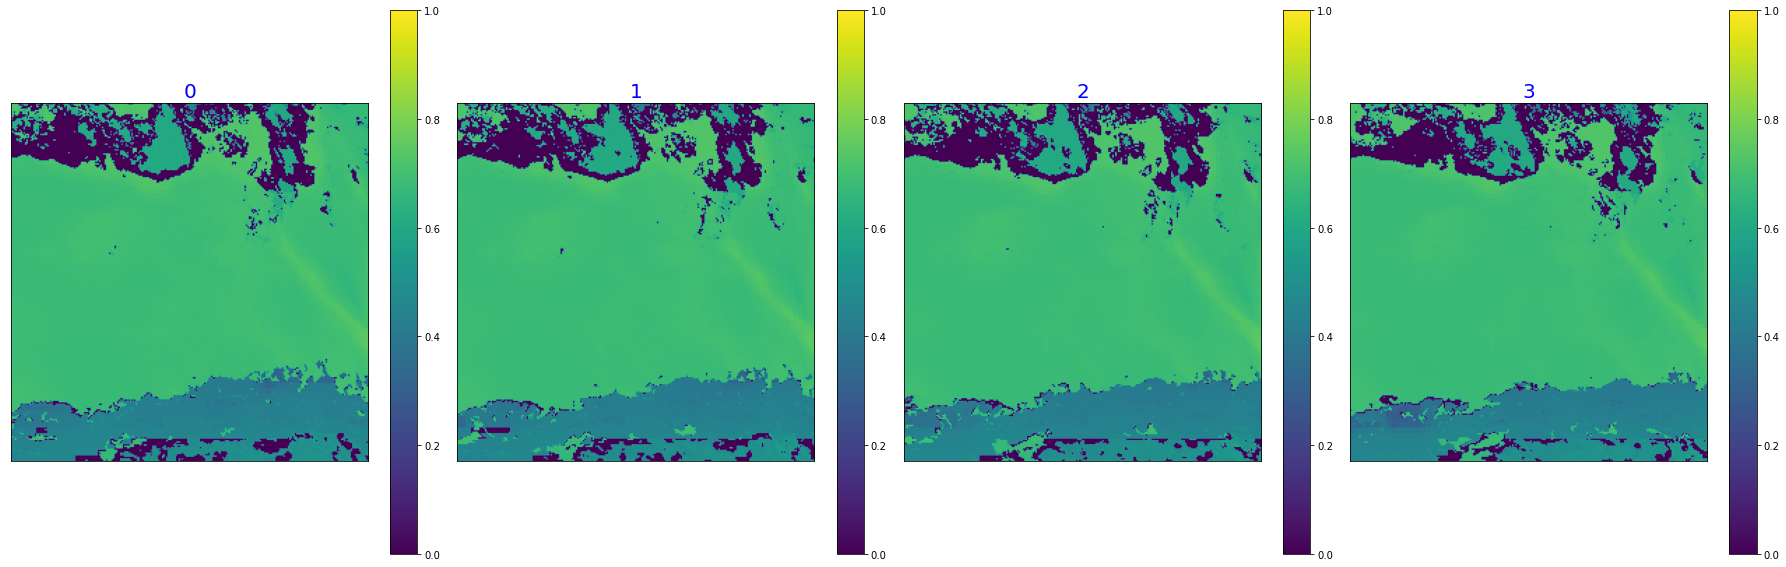

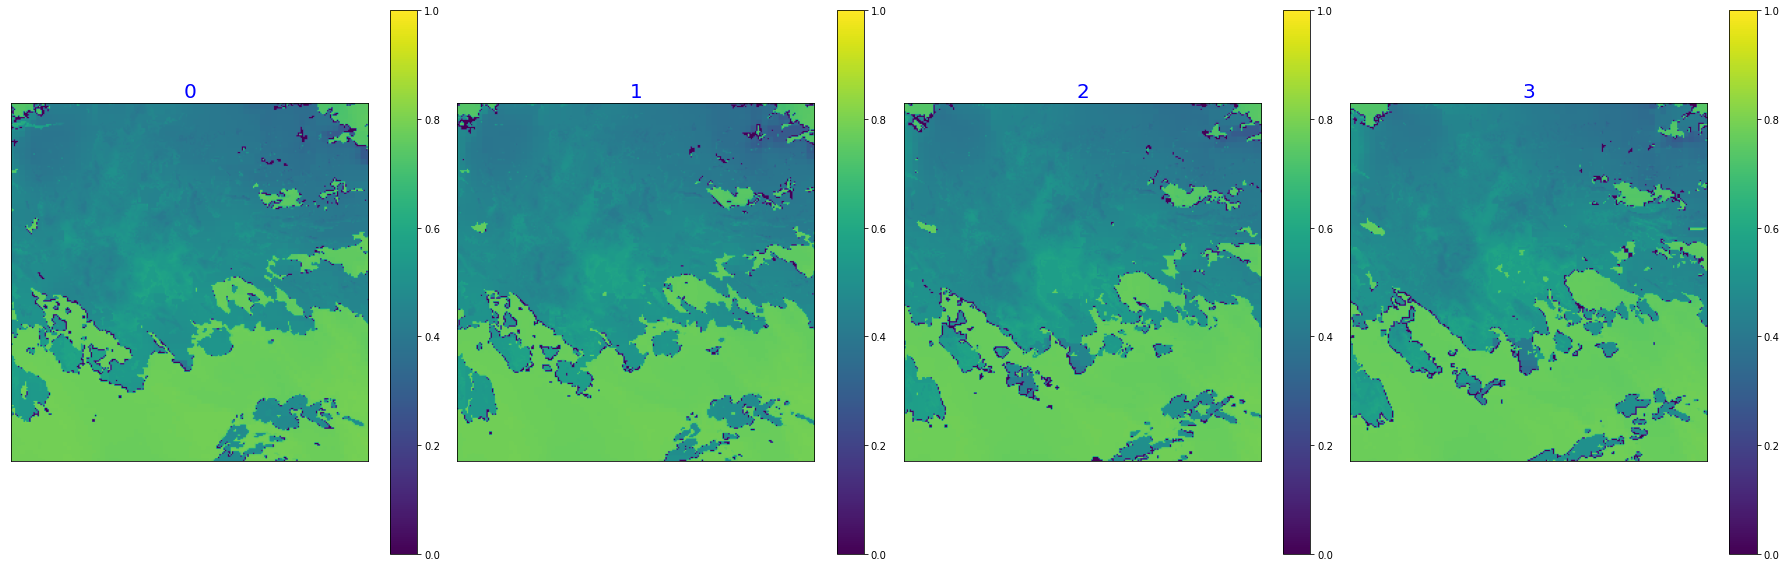

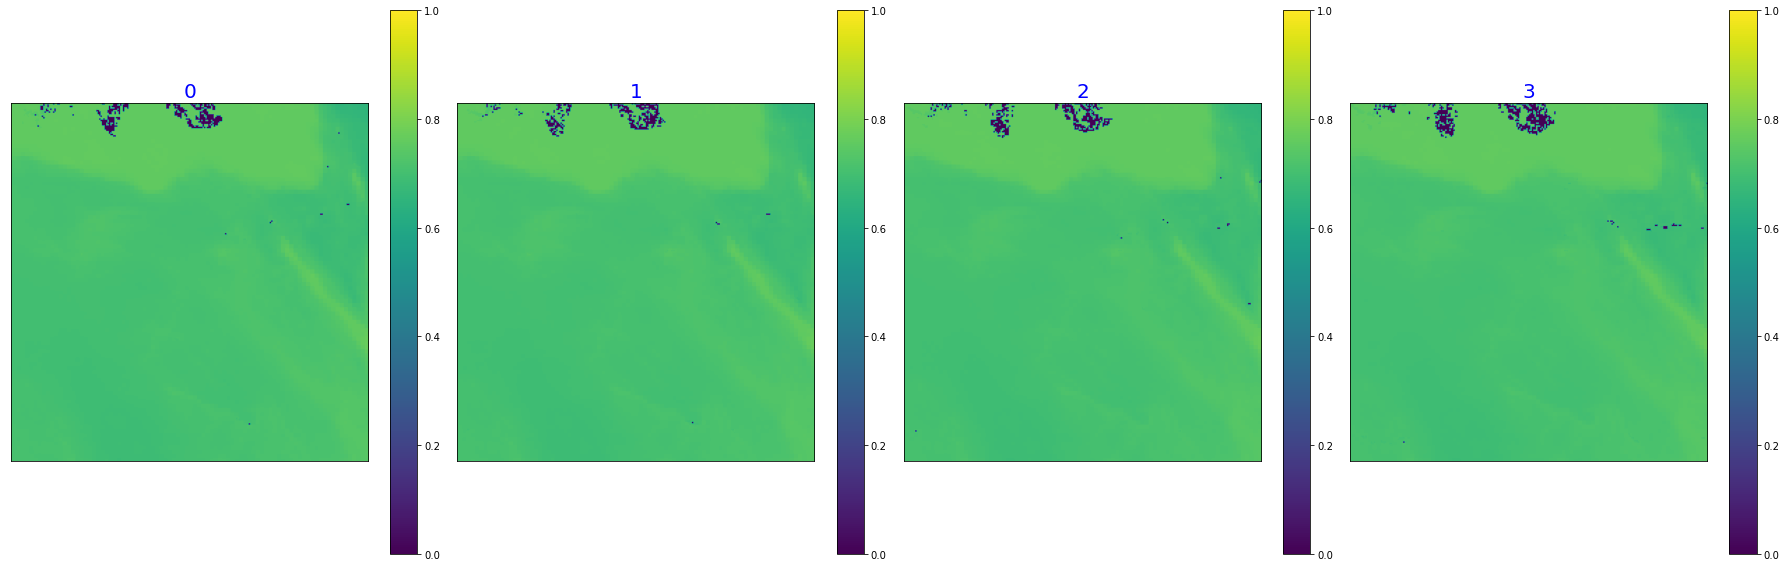

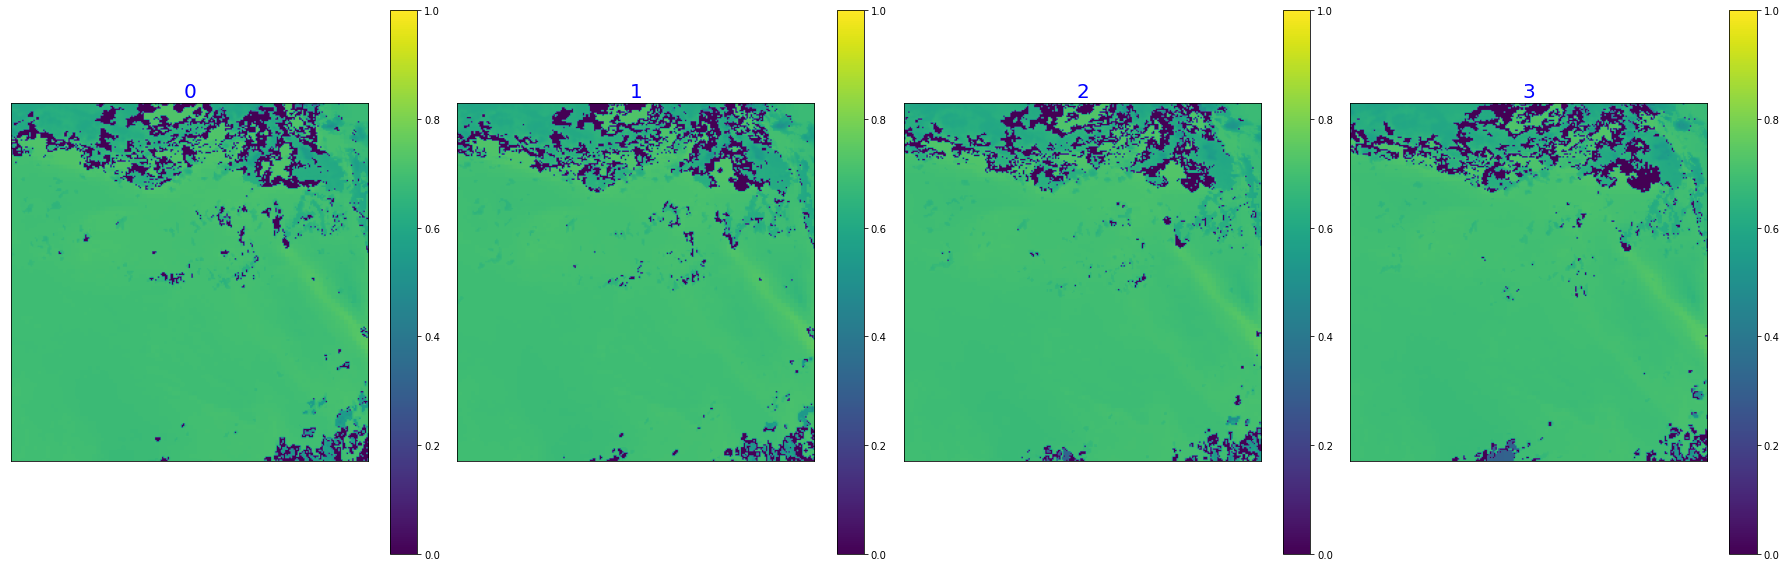

In [7]:
for i in range(5):
    plottings.plot_N([train_dataset[i][0][0, 0, ...], 
                      train_dataset[i][0][1, 0, ...], 
                      train_dataset[i][0][2, 0, ...], 
                      train_dataset[i][0][3, 0, ...]], [0, 1,2,3])
    

In [5]:
train_dataset[0][0].shape

(4, 1, 256, 256)

249 168


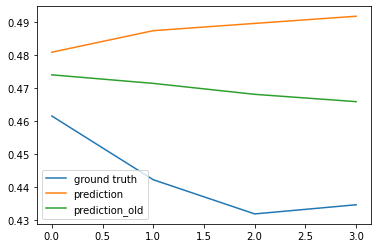

In [50]:
lon, lat = random.randint(0, 255), random.randint(0, 255)
print(lon, lat)
x=range(ground_truth.shape[1])
y1=ground_truth[0, :, 0, lon, lat]
y2=prediction[0, :, 0, lon, lat]
y3=prediction_old[0, :, 0, lon, lat]
fig = plt.figure()
plt.plot(x, y1, label="ground truth")
plt.plot(x, y2, label="prediction")
plt.plot(x, y3, label="prediction_old")

plt.legend()
plt.show()